In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
#display.set_matplotlib_formats('svg')
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# define the function as a function
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

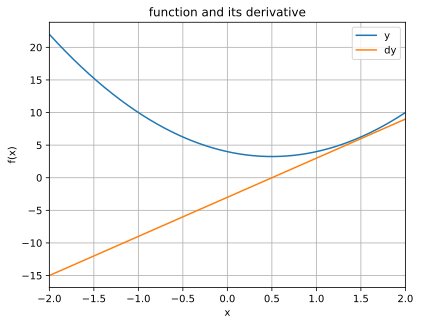

In [ ]:
# plot the function and its derivative
x = np.linspace(-2, 2, 2001)

# ploting
plt.plot(x, fx(x), x, deriv(x))
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.title('function and its derivative')
plt.show()

In [ ]:
# learning algorithm

# random starting point
localmin = np.random.choice(x, 1)

# learning parameters
learning_rate = 0.01
training_epochs = 100

# run through the training
local_mins = []
for i in range(training_epochs):
  grad = deriv(localmin) # 6x - 3
  localmin = localmin - learning_rate * grad # when grad is <0, will increase localmin; when grad is >0, reduce localmin
  local_mins +=list(localmin)

localmin

array([0.499326])

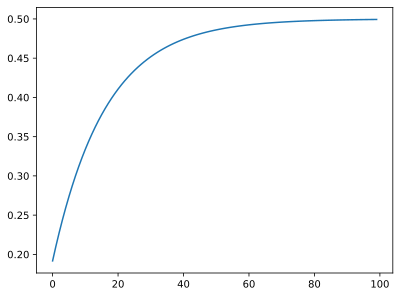

In [ ]:
plt.plot(range(len(local_mins)), local_mins)
plt.show()

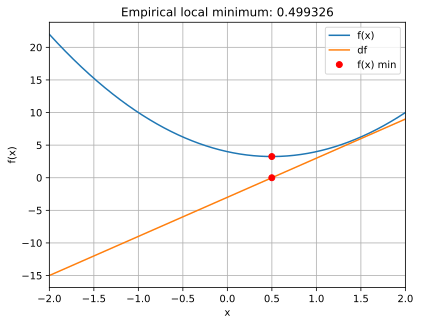

In [ ]:
# plot the result
plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title(f'Empirical local minimum: {localmin[0]:.6f}')
plt.show()

In [ ]:
localmin = np.random.choice(x, 1)

# learning parameters
learning_rate = 0.001
training_epochs = 1000

# run through the training and store all the results
modelparams = np.zeros((training_epochs, 2))
for i in range(training_epochs):
  grad = deriv(localmin) # 6x - 3
  localmin = localmin - learning_rate * grad # when grad is <0, will increase localmin; when grad is >0, reduce localmin
  modelparams[i, :] = localmin, grad

localmin

<ipython-input-105-e57b2c721240>:12: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparams[i, :] = localmin, grad


array([0.5])

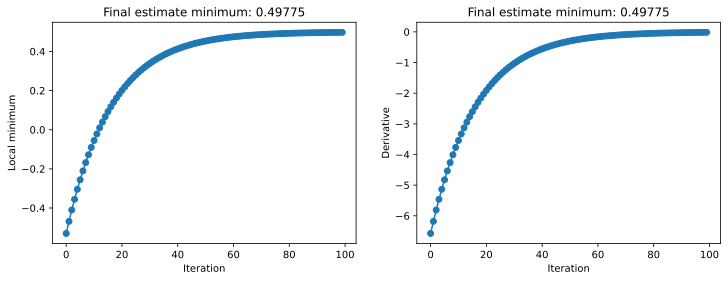

In [ ]:
# plot the gradient over iterations

fig, ax = plt.subplots(1, 2, figsize =(12, 4))
for i in range(2):
  ax[i].plot(modelparams[:, i], 'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimate minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

In [ ]:
localmin = np.random.choice(x, 1)

# learning parameters
learning_rate = 0.01
training_epochs = 1000

deriv_shreshold = 0.00000001

modelparams = []
while abs(grad) > deriv_shreshold:
  grad = deriv(localmin) # 6x - 3
  localmin = localmin - learning_rate * grad # when grad is <0, will increase localmin; when grad is >0, reduce localmin
  modelparams.append([localmin, grad])

modelparams = np.array(modelparams)

print(localmin)

[-1.69]


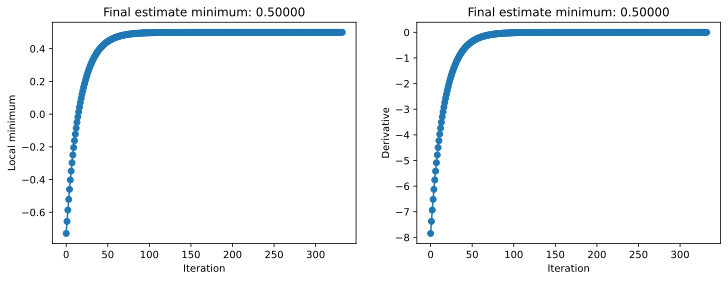

In [ ]:
# plot the gradient over iterations

fig, ax = plt.subplots(1, 2, figsize =(12, 4))
for i in range(2):
  ax[i].plot(modelparams[:, i], 'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimate minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

6.33 Code Challenge: unfortunate value

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos, sin
import sympy as sym
import sympy
import sympy.plotting.plot as symplot


In [ ]:
x = sym.symbols('x')
fx = sympy.cos(2*sympy.pi*x) + x**2

In [ ]:
fx

x**2 + cos(2*pi*x)

In [ ]:
df = sympy.diff(fx)
df


2*x - 2*pi*sin(2*pi*x)

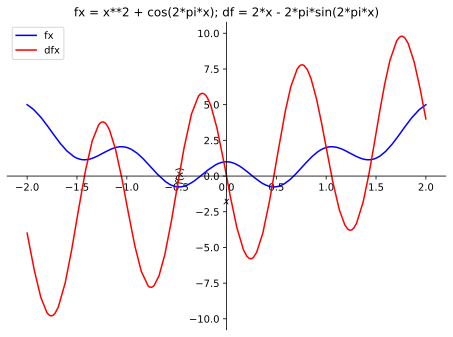

In [ ]:
p = symplot(fx, (x, -2, 2), label = 'fx', show = False, line_color = 'blue')
p.extend(symplot(df, (x, -2, 2), label = 'dfx', show = False, line_color = 'red' ))
p.legend = True
p.title = f'fx = {fx}; df = {df}'
p.show()

In [ ]:
def fx(x):
  return np.cos(2*pi*x) + x **2

def df(x):
  return 2*x - 2*pi*np.sin(2*pi*x)

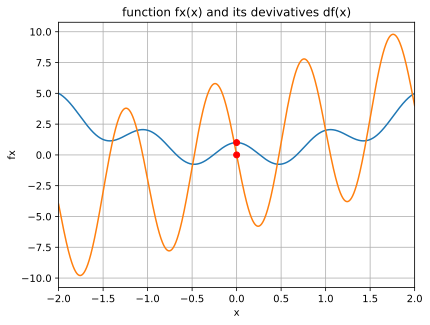

In [ ]:
# plot the function and derivative in another way
x = np.linspace(-2, 2, 2001)
localmin = 0

plt.plot(x, fx(x), x, df(x))
plt.plot(localmin, fx(localmin), 'ro')
plt.plot(localmin, df(localmin), 'ro')
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('fx')
plt.title('function fx(x) and its devivatives df(x)')
plt.show()

In [ ]:
# run iteration

learning_rate = 0.01
training_epochs = 100
localmin = np.random.choice(x, 1)

local_mins = []
for i in range(training_epochs):
  grad = df(localmin)
  localmin += -(grad * learning_rate)
  local_mins.append([localmin[0], grad])

localmin

array([-0.47580245])

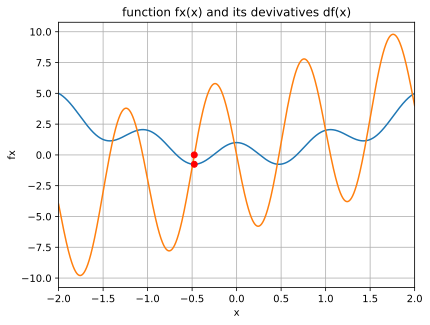

In [ ]:
# plot the function and derivative in another way
x = np.linspace(-2, 2, 2001)

plt.plot(x, fx(x), x, df(x))
plt.plot(localmin, fx(localmin), 'ro')
plt.plot(localmin, df(localmin), 'ro')
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('fx')
plt.title('function fx(x) and its devivatives df(x)')
plt.show()

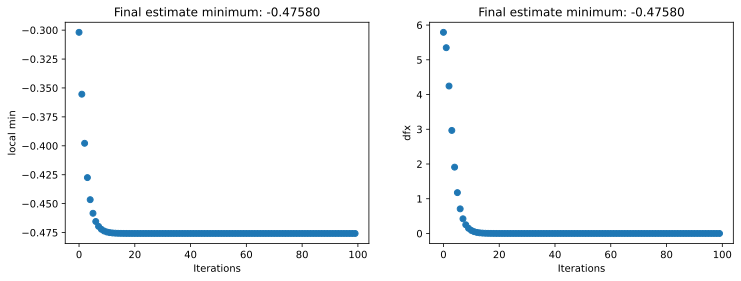

In [ ]:
# plot local min and grads
local_mins = np.array(local_mins)

fig, ax = plt.subplots(1, 2, figsize = (12, 4))

for i in range(2):
  ax[i].plot(local_mins[:, i], 'o')
  ax[i].set_xlabel('Iterations')
  my_ylabel = 'local min' if i == 0 else 'dfx'
  ax[i].set_ylabel(my_ylabel)
  ax[i].set_title(f'Final estimate minimum: {localmin[0]:.5f}')

plt.show()


#Additional explorations

In [ ]:
# stopping criteria

learning_rate = 0.01
#training_epochs = 100

stopping_criteria = 0.001


local_mins = []

for rep in range(200):
  localmin = np.random.choice(x, 1)
  grad = df(localmin)
  while abs(grad) > stopping_criteria:
    grad = df(localmin)
    localmin += -(grad * learning_rate)
    local_mins.append([localmin[0], grad])
localmin

array([0.47581441])

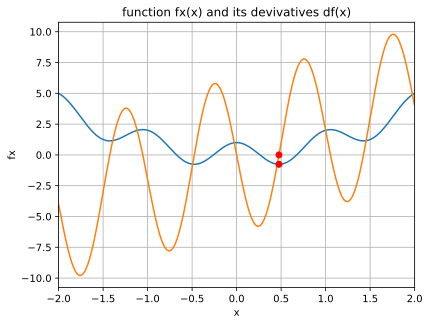

In [ ]:
# plot the function and derivative in another way
x = np.linspace(-2, 2, 2001)

plt.plot(x, fx(x), x, df(x))
plt.plot(localmin, fx(localmin), 'ro')
plt.plot(localmin, df(localmin), 'ro')
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('fx')
plt.title('function fx(x) and its devivatives df(x)')
plt.show()

6.34 Gradient descent in 2D

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # use to compute partial deriratives

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# the "peaks" function
def peaks(x, y):
  # expand to a 2D mesh
  x, y = np.meshgrid(x, y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z


In [ ]:
# create the landscape
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)

Z = peaks(x, y)

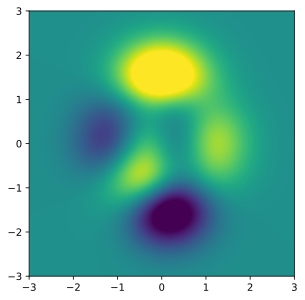

In [ ]:
# have a look
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin = -5, vmax = 5, origin = 'lower')
plt.show()

In [ ]:
# create derivative functions using sympy
sx, sy = sym.symbols('sx, sy')

In [ ]:
sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)

In [ ]:
sZ

3*(1 - sx)**2*exp(-sx**2 - (sy + 1)**2) - (-10*sx**3 + 2*sx - 10*sy**5)*exp(-sx**2 - sy**2) - 0.333333333333333*exp(-sy**2 - (sx + 1)**2)

In [ ]:
#

In [ ]:
# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx, sy), sym.diff(sZ, sx), 'sympy')
df_y = sym.lambdify( (sx, sy), sym.diff(sZ, sy), 'sympy')

In [ ]:
df_x(1, 1).evalf()

-1.07369833656079

In [ ]:
# random starting point (uniform between -2 and +2)
localmin = np.array([2.5, -2])#np.random.rand(2)*4 -2
startpnt = localmin[:]

# learning parameters
learning_rate = 0.05
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs, 2))
for i in range(training_epochs):
  grad = np.array([df_x(localmin[0], localmin[1]).evalf(),
                   df_y(localmin[0], localmin[1]).evalf()
                   ])
  localmin = localmin - learning_rate * grad # this finding the local min

  trajectory[i,:] = localmin

print(localmin)
print(startpnt)

[0.228278920556369 -1.62553495750000]
[ 2.5 -2. ]


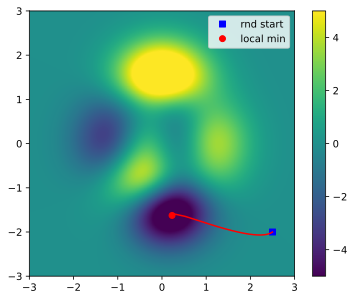

In [ ]:
# lets have a look!
plt.imshow(Z, extent =[x[0], x[-1], y[0], y[-1]], vmin = -5, vmax = 5, origin='lower')
plt.plot(startpnt[0], startpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
plt.plot(trajectory[:,0], trajectory[:,1], 'r')
plt.legend(['rnd start', 'local min'])
plt.colorbar()
plt.show()

# the final result matters with the starting point, if localmin - grad * learning rate, it will try to find the local min
# if localmin + grad* learning rate, it will try to find the local max


6.36 Parametric experiments on g.d.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# the function
x = np.linspace(-2*np.pi, 2*np.pi, 401)
x  = np.linspace(-2*np.pi,2*np.pi,401)
fx = np.sin(x) * np.exp(-x**2*.05)

# and its derivative
df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05)


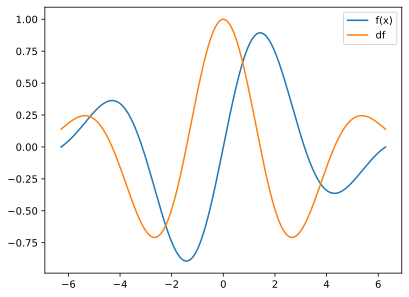

In [ ]:
# a quick plot
plt.plot(x, fx, x, df)
plt.legend(['f(x)', 'df'])
plt.show()

In [ ]:
# function (note: over-writing variable names!)
def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

# derivative function
def deriv(x):
  return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

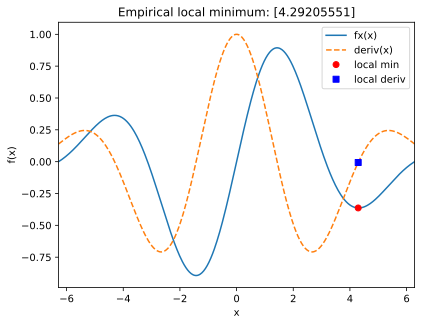

In [ ]:
# random startping point
localmin = np.random.choice(x, 1)

# learning parameters
learning_rate= 0.01
training_epochs = 1000

# running through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - grad * learning_rate

# plot the result
plt.plot(x, fx(x), x, deriv(x), '--')
plt.plot(localmin, fx(localmin),'ro')
plt.plot(localmin, deriv(localmin), 'bs')
plt.xlim(x[[0, -1]])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['fx(x)', 'deriv(x)', 'local min', 'local deriv'])
plt.title(f'Empirical local minimum: {localmin}')
plt.show()






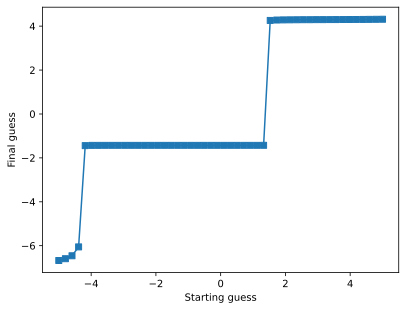

In [ ]:
# Experiment 1. systematically varying the starting locations

startlocs = np.linspace(-5, 5, 50)
finalres = np.zeros(len(startlocs))

# loop over starting points
for idx, localmin in enumerate(startlocs):

  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - grad * learning_rate

  finalres[idx] = localmin

plt.plot(startlocs, finalres, 's-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

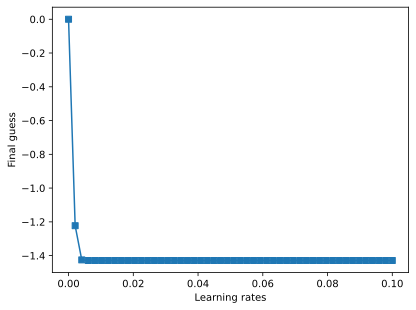

In [ ]:
# Experiment 2. systematically varying the learning rate
localmin = np.array([0])
learningrates = np.linspace(1e-10, 1e-1, 50)
finalres = np.zeros(len(startlocs))

# loop over starting points
for idx, learning_rate in enumerate(learningrates):

  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - grad * learning_rate

  finalres[idx] = localmin

plt.plot(learningrates, finalres, 's-')
plt.xlabel('Learning rates')
plt.ylabel('Final guess')
plt.show()

In [ ]:
# Experiment 3: interaction between learning rate and training epochs

# setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

# initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))



# loop over learning rates
for Lidx,learningRate in enumerate(learningrates):

  # loop over training epochs
  for Eidx,trainEpochs in enumerate(training_epochs):

    # run through training (again fixing starting location)
    localmin = 1.6
    for i in range(int(trainEpochs)):
      grad = deriv(localmin)
      localmin = localmin - learningRate*grad

    # store the final guess
    finalres[Lidx,Eidx] = localmin


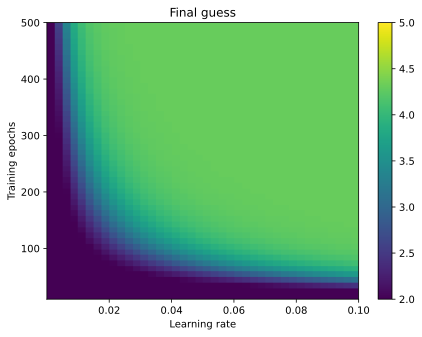

In [ ]:
# plot the results
fix, ax = plt.subplots(figsize = (7, 5))
plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=2,vmax=5)
plt.xlabel('Learning rate')
plt.ylabel('Training epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

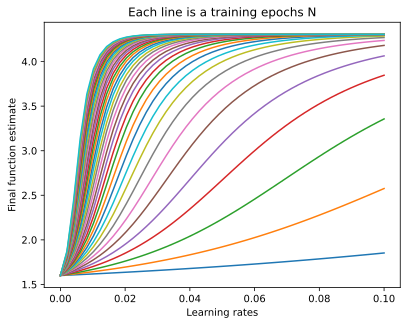

In [ ]:
# another visualization
plt.plot(learningrates,finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()

# 6.37 Code challenge: fixed vs dynamic learning

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [9]:
# define functions and derivative
def fx(x):
  return np.cos(2*np.pi*x) + x **2

def df(x):
  return 2*x - 2*np.pi*np.sin(2*np.pi*x)

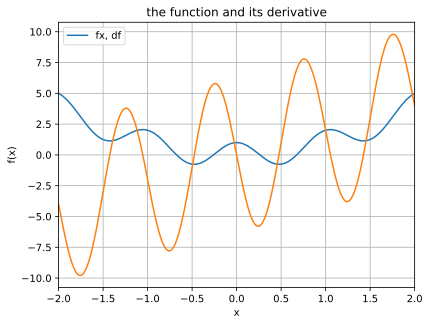

In [23]:
# draw the function and derivative
x = np.linspace(-2, 2, 2001)

plt.plot(x, fx(x), x, df(x))
plt.xlim(x[[0, -1]])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend(['fx, df'])
plt.title('the function and its derivative')
plt.show()

In [69]:
# fixed learning rate and training epochs

learning_rate = 0.01
training_epochs = 100

localmin = np.random.choice(x, 1)

local_mins = np.zeros((training_epochs, 2))

for i in range(training_epochs):
  grad = df(localmin)
  localmin = localmin - learning_rate * grad
  local_mins[i, :] = localmin, grad

localmin


array([-1.42506741])

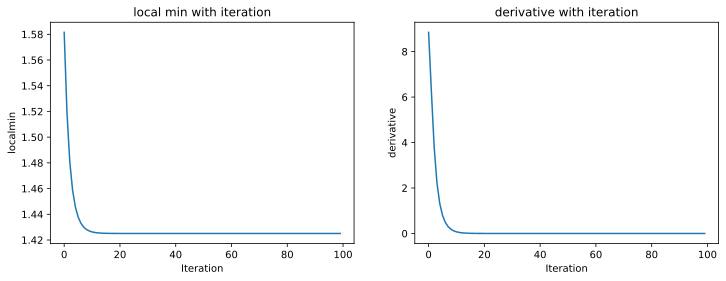

In [67]:
# plot localmins and grad
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
for i in range(2):
  ax[i].plot(local_mins[:,i])
  ax[i].set_xlabel('Iteration')
  y_label = 'localmin' if i == 0 else 'derivative'
  ax[i].set_ylabel(y_label)
  title = 'local min with iteration' if i == 0 else 'derivative with iteration'
  ax[i].set_title(title)


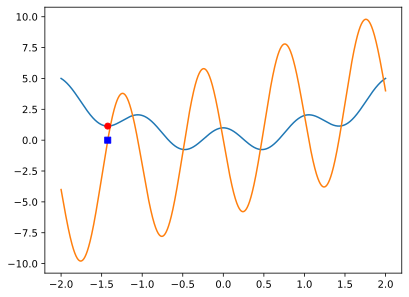

In [73]:
plt.plot(x, fx(x), x, df(x))
plt.plot(localmin, fx(localmin), 'ro')
plt.plot(localmin, df(localmin), 'bs')


In [89]:
# dynamic learning rate

learning_rate = 0.01
training_epochs = 1000

localmin =np.array([1.9]) #np.random.choice(x, 1)

local_mins = np.zeros((training_epochs, 2))


for i in range(training_epochs):
  grad = df(localmin)
  learning_rate = learning_rate / (i+1)
  localmin = localmin - learning_rate * grad
  local_mins[i, :] = localmin, grad

localmin


<ipython-input-89-48fa454b42c7>:15: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  local_mins[i, :] = localmin, grad


array([1.75754926])

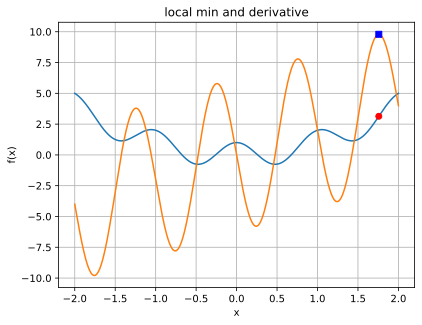

In [90]:
plt.plot(x, fx(x), x, df(x))
plt.plot(localmin, fx(localmin), 'ro')
plt.plot(localmin, df(localmin), 'bs')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.title('local min and derivative')
plt.show()


## Solutions

In [93]:
import numpy as np
import matplotlib.pyplot as plt
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [94]:
# functions
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

In [131]:
# random starting point
localmin = np.random.choice(x, 1)
initial = localmin[:]

# learning parameters
learning_rate = 0.01
training_epochs = 50

# running through training and store all results
modelparamsFixed = np.zeros((training_epochs, 3))
for i in range(training_epochs):

  # compute gradient
  grad = deriv(localmin)

  # non-adapative learning rate
  lr = learning_rate

  # update parameter according to gradient
  localmin = localmin - grad * learning_rate

  # store the parameters
  modelparamsFixed[i,:] = localmin, grad, lr

localmin




<ipython-input-131-d50f1e17d29f>:23: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparamsFixed[i,:] = localmin, grad, lr


array([0.44650974])

G.D. using a gradient-based learning rate

In [132]:
# random starting point
localmin = np.random.choice(x, 1)
initial = localmin[:]

# learning parameters
learning_rate = 0.01
training_epochs = 50

# running through training and store all results
modelparamsGrad = np.zeros((training_epochs, 3))
for i in range(training_epochs):

  # compute gradient
  grad = deriv(localmin)

  # non-adapative learning rate
  lr = learning_rate * np.abs(grad)

  # update parameter according to gradient
  localmin = localmin - grad * lr

  # store the parameters
  modelparamsGrad[i,:] = localmin, grad, lr

localmin

<ipython-input-132-8ad734056148>:23: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparamsGrad[i,:] = localmin, grad, lr


array([0.45196099])

In [133]:
# random starting point
localmin = np.random.choice(x, 1)
initial = localmin[:]

# learning parameters
learning_rate = 0.01
training_epochs = 50

# running through training and store all results
modelparamsTime = np.zeros((training_epochs, 3))
for i in range(training_epochs):

  # compute gradient
  grad = deriv(localmin)

  # non-adapative learning rate
  lr = learning_rate * (1-(i+1)/training_epochs)

  # update parameter according to gradient
  localmin = localmin - grad * lr

  # store the parameters
  modelparamsTime[i,:] = localmin, grad, lr

localmin

<ipython-input-133-8d3ea524faa5>:23: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparamsTime[i,:] = localmin, grad, lr


array([0.43573867])

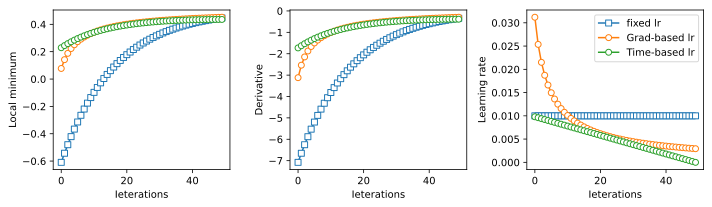

In [134]:
# plot the results

fig, ax = plt.subplots(1, 3, figsize = (10, 3))
for i in range(3):
  ax[i].plot(modelparamsFixed[:, i], 's-', markerfacecolor = 'w')
  ax[i].plot(modelparamsGrad[:, i], 'o-', markerfacecolor = 'w')
  ax[i].plot(modelparamsTime[:, i], 'o-', markerfacecolor = 'w')
  ax[i].set_xlabel('Ieterations')
ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['fixed lr', 'Grad-based lr', 'Time-based lr'])

plt.tight_layout()
plt.show()
